In [ ]:
!pip install braindecode
!pip install moabb

In [44]:
from braindecode.datasets import MOABBDataset
from braindecode.preprocessing import (
    exponential_moving_standardize, preprocess, Preprocessor)
from numpy import multiply

from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt


# Choosing subject

In [45]:
subject_id = 3
dataset = MOABBDataset(dataset_name="BNCI2014001", subject_ids=[subject_id])

48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]


In [46]:
dataset.description

,subject,session,run
0,3,session_T,run_0
1,3,session_T,run_1
2,3,session_T,run_2
3,3,session_T,run_3
4,3,session_T,run_4
5,3,session_T,run_5
6,3,session_E,run_0
7,3,session_E,run_1
8,3,session_E,run_2
9,3,session_E,run_3


In [47]:
dataset.datasets[0].raw

<RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>

# Raw Data

In [ ]:
dir(dataset.datasets[0].raw)

In [62]:
dataset.datasets[0].raw.to_data_frame()["stim"].value_counts()

0.0    96687
1.0       12
2.0       12
3.0       12
4.0       12
Name: stim, dtype: int64

# Preprocessing

In [ ]:
low_cut_hz = 4.  # low cut frequency for filtering
high_cut_hz = 38.  # high cut frequency for filtering
# Parameters for exponential moving standardization
factor_new = 1e-3
init_block_size = 1000
# Factor to convert from V to uV
factor = 1e6

preprocessors = [
    Preprocessor('pick_types', eeg=True, meg=False, stim=False),  # Keep EEG sensors
    Preprocessor(lambda data: multiply(data, factor)),  # Convert from V to uV
    Preprocessor('filter', l_freq=low_cut_hz, h_freq=high_cut_hz),  # Bandpass filter
    Preprocessor(exponential_moving_standardize,  # Exponential moving standardization
                 factor_new=factor_new, init_block_size=init_block_size)
]

# Create transformed dataset
prepro_dataset = MOABBDataset(dataset_name="BNCI2014001", subject_ids=[subject_id])
# Transform the data
preprocess(prepro_dataset, preprocessors)


# Dataset preprocessed

In [64]:
type(prepro_dataset.datasets[0].raw)

mne.io.array.array.RawArray

In [50]:
prepro_dataset.datasets[0].raw

<RawArray | 22 x 96735 (386.9 s), ~16.3 MB, data loaded>

In [51]:
dataset.datasets[0].raw

<RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>

Effective window size : 8.192 (s)


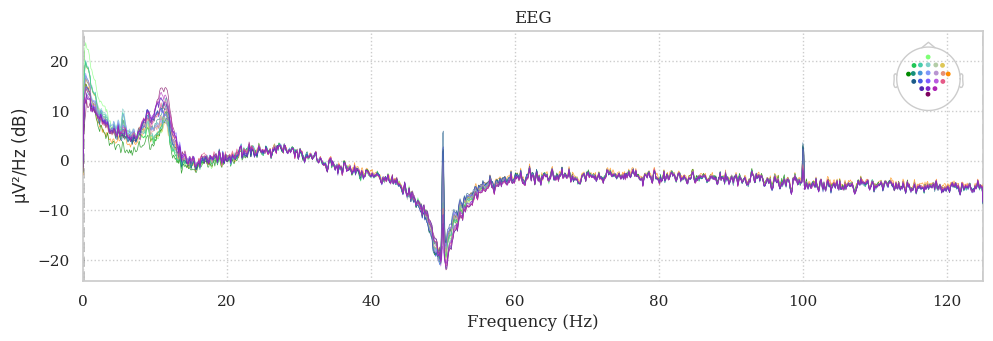

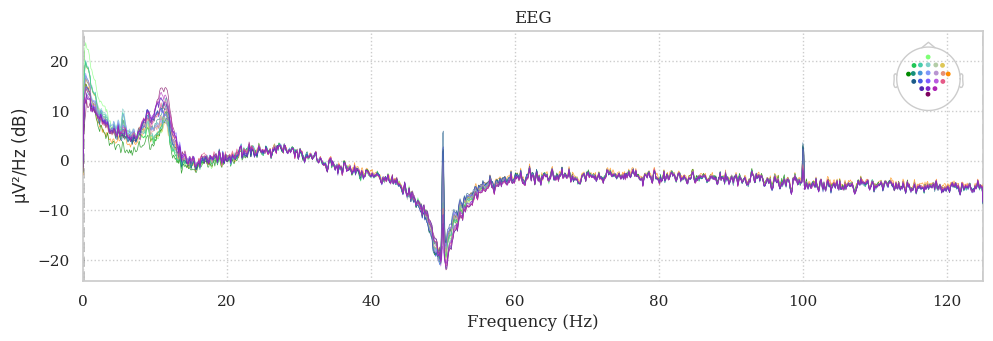

In [52]:
dataset.datasets[1].raw.compute_psd().plot(picks='eeg')

Effective window size : 8.192 (s)


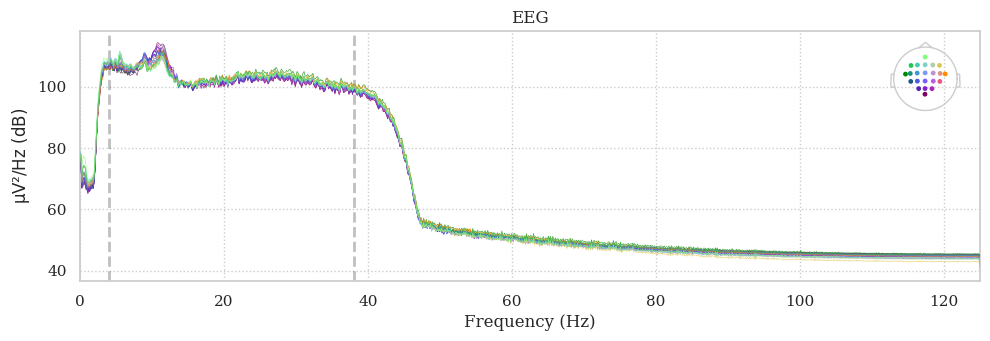

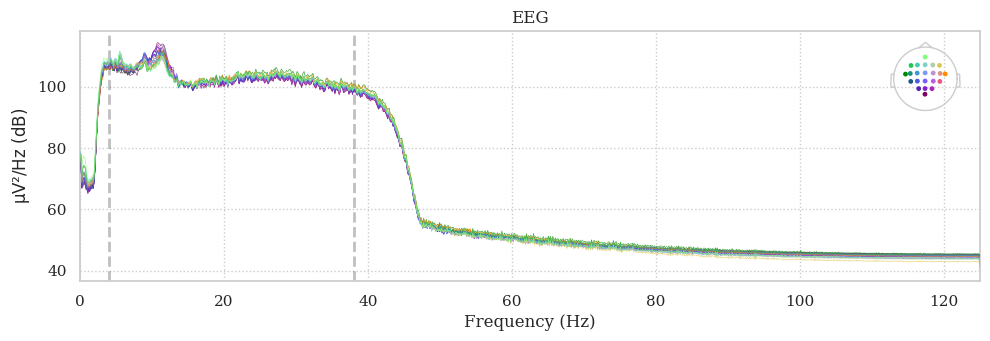

In [75]:
prepro_dataset.datasets[1].raw.compute_psd().plot(picks='eeg')

In [71]:
yf.shape

(96735,)

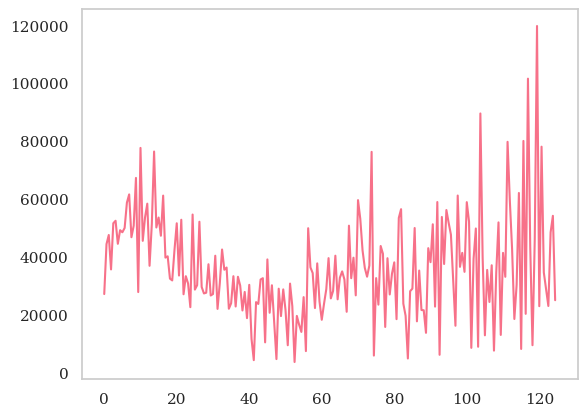

In [70]:
# Number of sample points
N = 400
# sample spacing
T = 1.0 / 250.0
# x = np.linspace(0.0, N*T, N, endpoint=False)
x = prepro_dataset.datasets[0].raw.to_data_frame()["time"].values
y = prepro_dataset.datasets[0].raw.to_data_frame()["C5"].values
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()